In [3]:
#!pip install -q tensorflow-gpu==2.8.0rc0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 952.8/952.8 kB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 67.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
arviz 0.15.1 requires setuptools>=60.0.0, but you have setuptools 59.8.0 which is incompatible.
cvxpy 1.3.1 requires setuptools>65.5.1, but you have setuptools 59.8.0 which is incompatible.
tensorflow 2.12

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
tf.__version__

'2.8.0-rc0'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

11501568/11490434 [==============================] - 1s 0us/step


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq = 1)

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x = train_images,
          y = train_labels,
          epochs = 5,
          validation_data = (test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1611 - accuracy: 0.9505 - val_loss: 0.0481 - val_accuracy: 0.9827
Epoch 2/5
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0389 - val_accuracy: 0.9890
Epoch 3/5
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0345 - accuracy: 0.9888 - val_loss: 0.0347 - val_accuracy: 0.9882
Epoch 4/5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0388 - val_accuracy: 0.9873
Epoch 5/5
1875/1875 [==============================] - 117s 62ms/step - loss: 0.0220 - accuracy: 0.9931 - val_loss: 0.0320 - val_accuracy: 0.9903


In [13]:
y_true = test_labels
y_pred = np.argmax(model.predict(test_images), axis=-1)

In [11]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

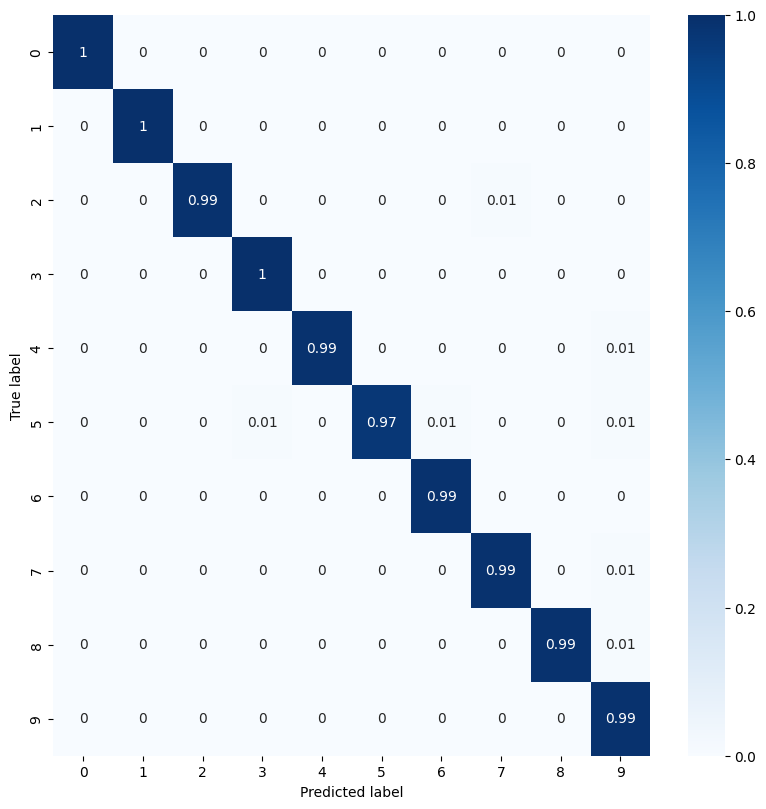

In [15]:
con_mat = tf.math.confusion_matrix(labels = y_true, predictions = y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals = 2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes,
                          columns = classes)

figure = plt.figure(figsize = (8, 8))
sns.heatmap(con_mat_df, annot = True, cmap = plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
sensibilidade = 9.91/(9.91 + 0.07)
especificidade = 83 / (0.07 + 83)
acuracia = (9.91 + 83) / 10
precisao = 9.91 / (9.91 + 0.07)
f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

In [19]:
print(sensibilidade)
print(especificidade)
print(acuracia)
print(precisao)
print(f_score)

0.9929859719438877
0.9991573371855063
9.291
0.9929859719438877
0.9929859719438877
